#### Bimodal cell population growth model
Based on the logistic growth model 

$\frac{\ dX}{\ dt} = rX(1-\frac{\ X}{\ K}) - \gamma X $ \
\
**where**, \
$\frac{\ dX}{\ dt}$ - rate of change of the population \
$r$ - growth constant \
$X$ - number of individuals in the population \
$K$ - carrying capacity \
$\gamma$ - death rate

**For Gillesspie:** \
$X$ &rarr; $X + 1$ at a rate $rX$\
$X$ &rarr; $X - 1$ at a rate $\frac{\ rX^2}{\ K} + \gamma X $

<function matplotlib.pyplot.show(close=None, block=None)>

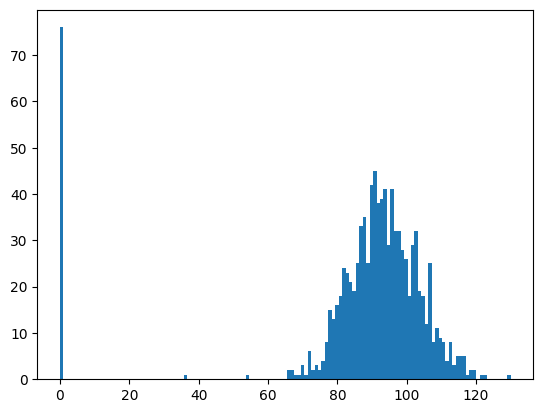

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import random

def sim(X, pars, t_end):
    
    r = pars[0]
    K = pars[1]
    gamma = pars[2]

    t = [0]

    while t[-1] < t_end and X[-1] > 0:

        currentX = X[-1]
        rates = [r*currentX, r*currentX**2/K + gamma*currentX]
        ratesum = sum(rates)

        tau = np.random.exponential(scale=1/ratesum)

        t.append(t[-1] + tau)

        rand = random.uniform(0,1)

        if rand * ratesum <= rates[0]:
            X.append(X[-1] + 1)
        else:
            X.append(X[-1] - 1)
            
    return([t,X])

cell_counts = []

for i in range(1000):
    X_0 = [1]
    pars = [1, 100, 0.05]  # r, K, gamma
    t_end = 12

    [t_out, X_out] = sim(X_0, pars, t_end)
    
    cell_counts.append(X_out[-1])

plt.hist(cell_counts, bins = np.max(cell_counts)+1)  #distribution of simulation results (final X values) 
plt.show



